# Chile Climate Risk Analysis on Copper Price

#### Research Questions / Hypotheses:
We hypothesize that climate and economic conditions in Chile have a measurable impact on copper production. Specifically, we investigate how El Niño events (as captured by the Oceanic Niño Index (ONI)), annual temperature, precipitation, inflation, and GDP growth in Chile correlate with variations in national copper output.


We further hypothesize that changes in global copper production and demand influence global copper prices. Given Chile’s position as the world’s largest copper producer, production shifts—especially those driven by climate and macroeconomic shocks—may contribute to observable movements in international copper markets.
Major Data sets:
USGS
NOAA
CMIP6

## I. Copper Production

### I.A. Global Copper Production

/srv/conda/envs/notebook/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/tmp/ipykernel_200/2236578978.py:38: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged['centroid'] = merged.geometry.centroid
/tmp/ipykernel_200/2236578978.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('Pastel1', len(merged))
/srv/conda/envs/notebook/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_la

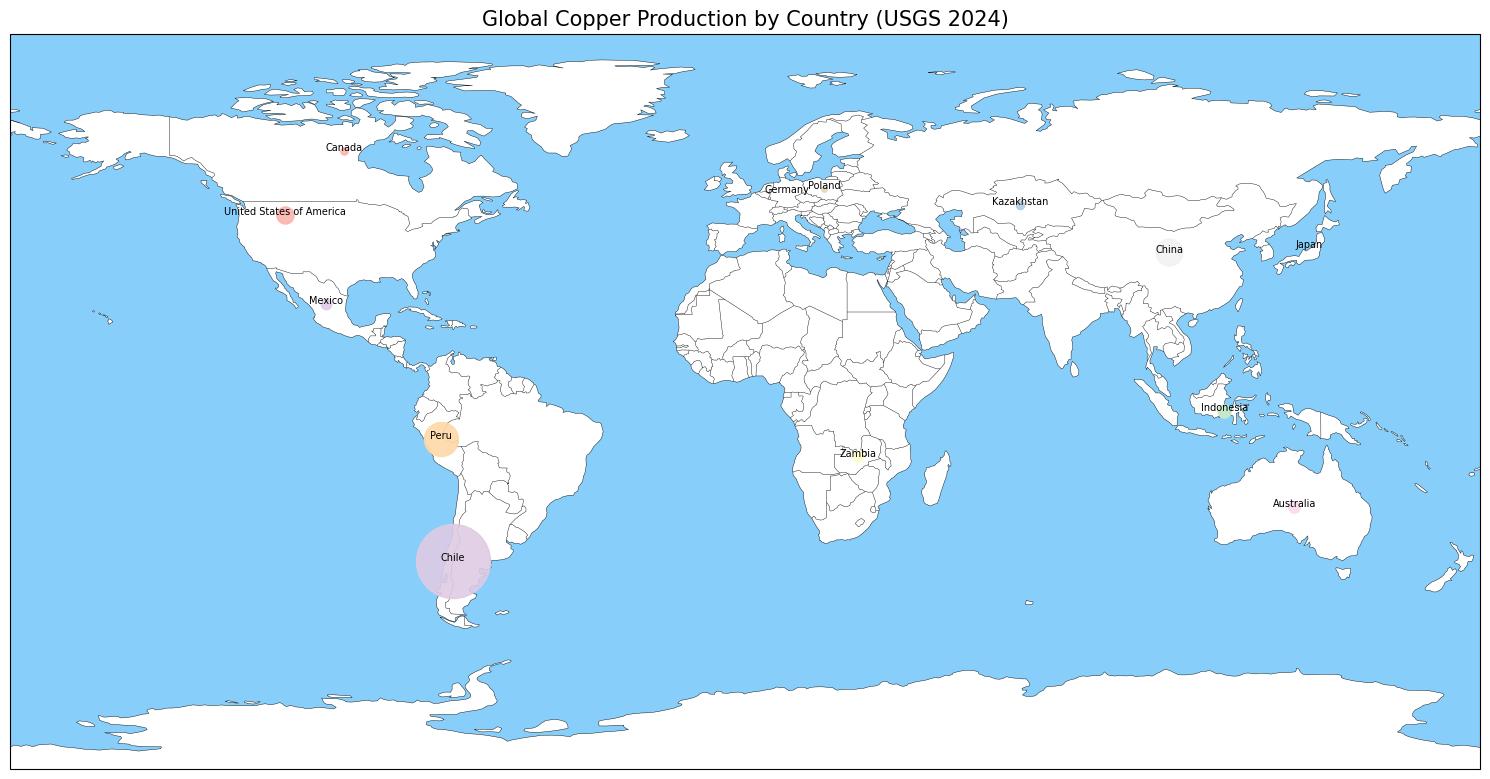

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import natural_earth
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

# Step 1: Load copper production CSV
url = "https://raw.githubusercontent.com/YananZhang963/Final-Project/main/mcs2024-copper_world.csv"
df = pd.read_csv(url)

# Step 2: Clean & fix country names
df = df.rename(columns={'Prod_kt_2022': 'Production_kt'})
df['Production_kt'] = pd.to_numeric(df['Production_kt'], errors='coerce')
df['Country'] = df['Country'].replace({
    'United States': 'United States of America',
    'Russia': 'Russian Federation',
    'Iran': 'Iran (Islamic Republic of)',
    'Vietnam': 'Viet Nam',
    'Syria': 'Syrian Arab Republic',
    'South Korea': 'Republic of Korea',
    'North Korea': 'Dem. Rep. Korea',
    'Czech Republic': 'Czechia',
    'DR Congo': 'Democratic Republic of the Congo'
})

# Step 3: Load world map
shapefile = natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
world = gpd.read_file(shapefile)

# Step 4: Merge data
merged = world.merge(df, how='left', left_on='NAME', right_on='Country')
merged = merged.dropna(subset=['Production_kt']).reset_index(drop=True)

# Step 5: Compute centroids
merged['centroid'] = merged.geometry.centroid

# Step 6: Set up map
fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.add_feature(cfeature.LAND, facecolor='white')
ax.add_feature(cfeature.OCEAN, facecolor='lightskyblue')
ax.add_feature(cfeature.BORDERS, linewidth=0.3)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)

# Step 7: Assign unique pastel color per country
colors = cm.get_cmap('Pastel1', len(merged))
for idx, row in merged.iterrows():
    color = colors(idx % colors.N)
    ax.plot(row['centroid'].x, row['centroid'].y,
            marker='o',
            markersize=row['Production_kt'] / 100,
            color=color,
            alpha=0.9,
            transform=ccrs.PlateCarree())
    ax.text(row['centroid'].x, row['centroid'].y, row['Country'],
            fontsize=7, ha='center', transform=ccrs.PlateCarree())

# Final styling
plt.title("Global Copper Production by Country (USGS 2024)", fontsize=15)
plt.tight_layout()
plt.show()


##### Chile is the largest producer of Copper in the World

### I.B. Major mines in Chile

In [4]:
import folium

# Define the mines dictionary explicitly
mines = {
    'Escondida Mine': (-24.2687, -69.0685),
    'Chuquicamata Mine': (-22.2985, -68.9019),
    'El Teniente Mine': (-34.0875, -70.3894),
    'Collahuasi Mine': (-20.9975, -68.6789),
    'Los Pelambres Mine': (-31.7253, -70.4928)
}

# Initialize Chile map centered in the north-central region
m = folium.Map(location=[-27, -70], zoom_start=5)

# Add mines as markers
for name, (lat, lon) in mines.items():
    folium.Marker(
        location=[lat, lon],
        popup=name,
        icon=folium.Icon(color='red', icon='industry', prefix='fa')
    ).add_to(m)

m.save("chile_mines_map.html")

m

**Major Copper Production Mines Mapping in Chile**

### I.C. Chile's Copper Import and Export

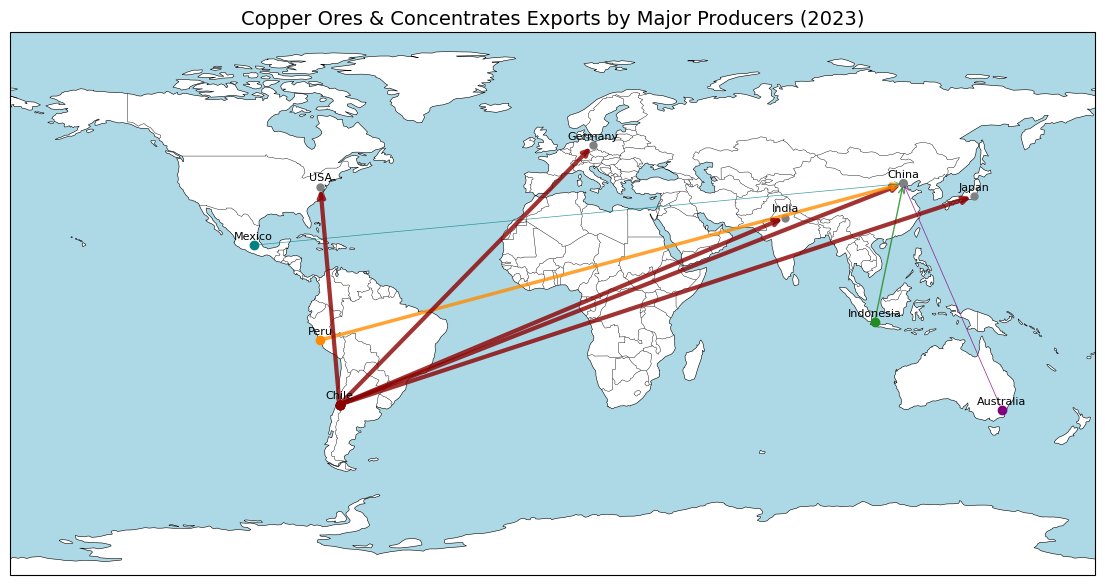

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Top exporters (~2023 USD billions)
exporters = {
    'Chile': 24.3,
    'Peru': 19.99,
    'Indonesia': 8.33,
    'Australia': 4.34,
    'Mexico': 3.72
}

# Selected export flows only
flows = [
    ('Chile', 'China'),
    ('Peru', 'China'),
    ('Indonesia', 'China'),
    ('Australia', 'China'),
    ('Mexico', 'China'),
    ('Chile', 'Japan'),
    ('Chile', 'Germany'),
    ('Chile', 'India'),
    ('Chile', 'USA')
]

# Approximate lat/lon for capitals
coords = {
    'Chile': (-33.45, -70.66),
    'Peru': (-12.04, -77.03),
    'Indonesia': (-6.21, 106.85),
    'Australia': (-35.28, 149.13),
    'Mexico': (19.43, -99.13),
    'China': (39.90, 116.40),
    'Japan': (35.68, 139.76),
    'Germany': (52.52, 13.40),
    'India': (28.61, 77.21),
    'USA': (38.90, -77.04)
}

# Define custom colors for each exporter
export_colors = {
    'Chile': 'darkred',
    'Peru': 'darkorange',
    'Indonesia': 'forestgreen',
    'Australia': 'purple',
    'Mexico': 'teal'
}

# Setup map
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.add_feature(cfeature.LAND, facecolor='white')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, linewidth=0.4)
ax.add_feature(cfeature.BORDERS, linewidth=0.3)

# Plot only exports with unique colors per country
for exp, imp in flows:
    elat, elon = coords[exp]
    ilat, ilon = coords[imp]
    val = exporters.get(exp, 1)
    color = export_colors.get(exp, 'red')  # fallback color

    ax.annotate(
        '', xy=(ilon, ilat), xytext=(elon, elat),
        xycoords=ccrs.Geodetic()._as_mpl_transform(ax),
        textcoords=ccrs.Geodetic()._as_mpl_transform(ax),
        arrowprops=dict(arrowstyle='->', color=color, linewidth=val/8, alpha=0.8)
    )

    # Plot exporter dot
    ax.plot(elon, elat, 'o', color=color, transform=ccrs.PlateCarree(), markersize=6)
    # Plot importer dot (gray)
    ax.plot(ilon, ilat, 'o', color='gray', transform=ccrs.PlateCarree(), markersize=5)

# Add labels for countries
for country, (lat, lon) in coords.items():
    ax.text(lon, lat + 2, country, fontsize=8, ha='center', transform=ccrs.PlateCarree())

plt.title("Copper Ores & Concentrates Exports by Major Producers (2023)", fontsize=14)
plt.show()

**Map of Chiles Exports and Imports**

## II. Climate risk impact on Chile

In [6]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

**ENSO, or El Niño Southern Oscillation, is the variation of sea surface temperature accross the tropical Pacific ocean. When the trade wind weakens, the warm water to expand to the East, known as El Niño, resulting in warmer sea surface temperature in centeral pacific, flat thermocline, and central-pacific centered convection. Since Chile is on the East-South Pacific, and we know that precipitation affects copper industry, we wonder if ENSO (temperature and precipitation) plays a role in copper production. In other words, we wonder how does the temperature and precipitation variation cycle in Chile affect copper price and  production.**

### II.A. ENSO

#### Load SST data from NASA

In [7]:
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds_nino = xr.open_dataset(url, drop_variables=['time_bnds'])
ds_nino_sel = ds_nino.sel(time=slice('1900', '2020')).load()
ds_nino_sel

<xarray.Dataset> Size: 93MB
Dimensions:  (lat: 89, lon: 180, time: 1452)
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 12kB 1900-01-01 1900-02-01 ... 2020-12-01
Data variables:
    sst      (time, lat, lon) float32 93MB -1.8 -1.8 -1.8 -1.8 ... nan nan nan
Attributes: (12/39)
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    ...                              ...
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    data_modified:                   2025-07-03
    DODS_EXTRA.Unlimited_Dimension:  time

**Select lontitude latitude to Niño 3.4, and group time from 1951 to 1980 as a baseline (neutral). We see that temperature varies by +/- 2.8 during El Niño and La Niña year. We selected 1982 as our El Niño year and 1999 as La Niña year since they are more recent and both greatly affected Chile.** 

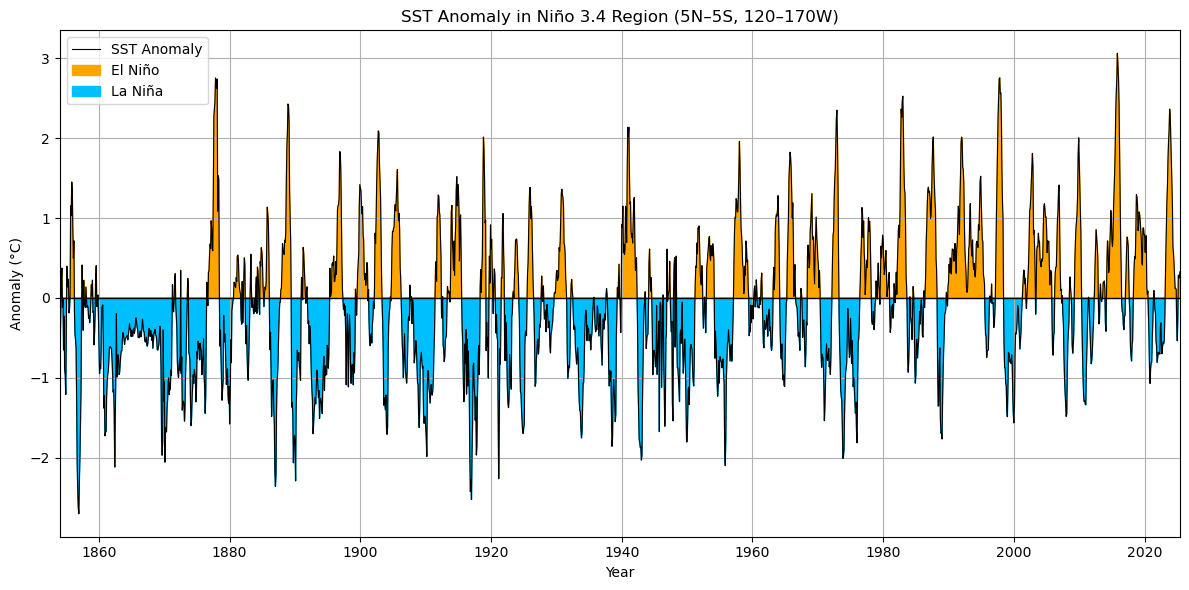

In [8]:
# Compute anomalies for niño 3.4 area
nino34 = ds_nino['sst'].sel(lat=slice(5, -5), lon=slice(190, 240))
nino34_mean = nino34.mean(dim=['lat', 'lon'], skipna=True)
clim = nino34_mean.sel(time=slice('1951', '1980')).groupby('time.month').mean('time')
anomalies = nino34_mean.groupby('time.month') - clim

# Plot
plt.figure(figsize=(12, 6))
plt.plot(anomalies['time'], anomalies, color='black', linewidth=0.8, label='SST Anomaly')

# Fill above and below normal
plt.fill_between(anomalies['time'], 0, anomalies, where=anomalies >= 0, color='orange', label='El Niño', interpolate=True)

plt.fill_between(anomalies['time'], 0, anomalies, where=anomalies < 0, color='deepskyblue', label='La Niña', interpolate=True)

# Styling
plt.axhline(0, color='black', linewidth=1)
plt.title('SST Anomaly in Niño 3.4 Region (5N–5S, 120–170W)')
plt.ylabel('Anomaly (°C)')
plt.xlabel('Year')
plt.grid(True)

# Remove whitespace on x axis
plt.xlim(anomalies['time'].values[0], anomalies['time'].values[-1])

plt.legend()
plt.tight_layout()
plt.show()

**1982 El Niño vs. 1999 La Niña**

**We chose 1951-1980 as baseline for the global sst mean and computed the difference with 1982 and 1999. We see how during El Niño year the SST temperature is positive near Chile coast and vice versa for the La Niña year. Given that sst varies near Chile, this is why we decided to further look into the temperature and precipitation variation in Chile itself.**

In [9]:
# Compute monthly climatology from 1951–1980 (baseline)
clim = ds_nino['sst'].sel(time=slice('1951', '1980')).groupby('time.month').mean('time')

# Select data for 1982 and 1999
sst_1982 = ds_nino['sst'].sel(time=slice('1982-01-01', '1982-12-31'))
sst_1999 = ds_nino['sst'].sel(time=slice('1999-01-01', '1999-12-31'))

# Compute monthly anomalies
anom_1982 = sst_1982.groupby('time.month') - clim
anom_1999 = sst_1999.groupby('time.month') - clim

# Compute annual mean anomalies
anom_1982_annual = anom_1982.mean(dim='time')
anom_1999_annual = anom_1999.mean(dim='time')

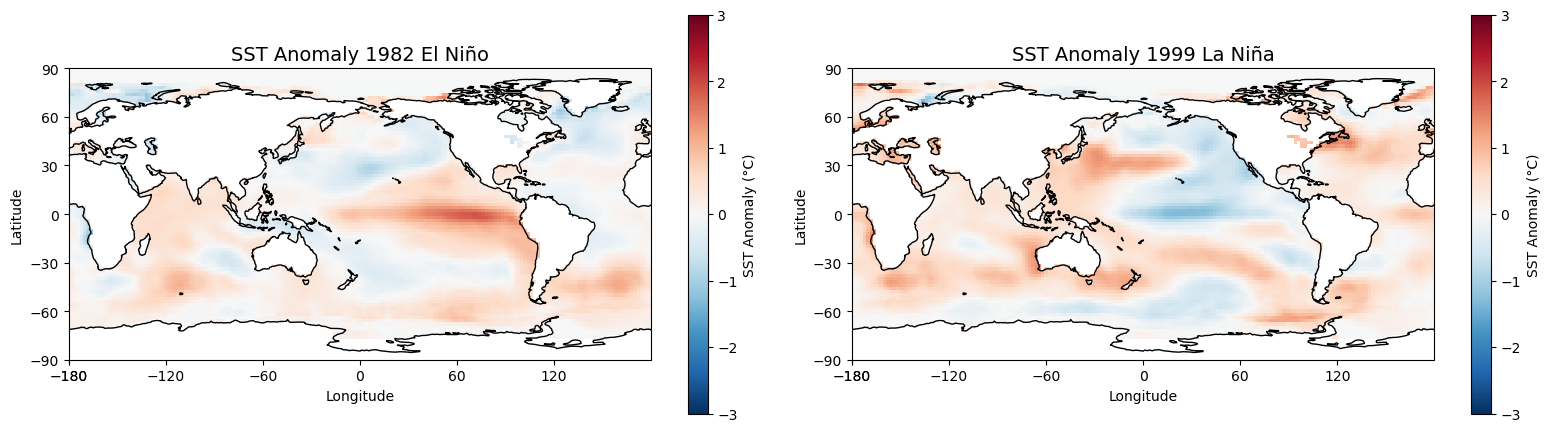

In [10]:
# 2 plots for el nino and la nina
fig, axes = plt.subplots(1, 2, figsize=(16, 6), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})

# Define common plot settings
vmin, vmax = -3, 3
cmap = 'RdBu_r'
xticks = range(0, 361, 60)
yticks = range(-90, 91, 30)

# Plot el niño 1982
plot1 = anom_1982_annual.plot(
    ax=axes[0],
    transform=ccrs.PlateCarree(),
    cmap=cmap,
    vmin=vmin,
    vmax=vmax,
    cbar_kwargs={'label': 'SST Anomaly (°C)', 'shrink': 0.7}
)
axes[0].set_title("SST Anomaly 1982 El Niño", fontsize=14)
axes[0].coastlines()
axes[0].set_xticks(xticks, crs=ccrs.PlateCarree())
axes[0].set_yticks(yticks, crs=ccrs.PlateCarree())
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

# Plot la niña 1999
plot2 = anom_1999_annual.plot(
    ax=axes[1],
    transform=ccrs.PlateCarree(),
    cmap=cmap,
    vmin=vmin,
    vmax=vmax,
    cbar_kwargs={'label': 'SST Anomaly (°C)', 'shrink': 0.7}
)
axes[1].set_title("SST Anomaly 1999 La Niña", fontsize=14)
axes[1].coastlines()
axes[1].set_xticks(xticks, crs=ccrs.PlateCarree())
axes[1].set_yticks(yticks, crs=ccrs.PlateCarree())
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")

# Layout
plt.tight_layout()
plt.show()

### II.B. Temperature Variation

**Now looking specifically at Chile's temperature variation, we used CESM2 model from CMIP6 and computed the difference between 1982 and 1999. The positive difference means that the temperature is higher in 1982 than 1999, and the negative difference means that the temperature is lower in 1982 than 1999. Overall, we see that there is a +/- 1.5C difference between those two years. We see that Mid to Northern Chile is warmer during El Niño year, and the Southern Chile is warmer during La Niña year. This shows how ENSO has an inverse effect on temperature in Chile on a latitude scale.**

In [11]:
from xmip.preprocessing import combined_preprocessing
from xmip.utils import google_cmip_col
from xmip.postprocessing import match_metrics
import matplotlib.pyplot as plt

In [12]:
col = google_cmip_col()
col

Future exception was never retrieved
future: <Future finished exception=ClientConnectionError('Connection lost: [SSL: APPLICATION_DATA_AFTER_CLOSE_NOTIFY] application data after close notify (_ssl.c:2706)')>
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.12/asyncio/sslproto.py", line 651, in _do_shutdown
    self._sslobj.unwrap()
  File "/srv/conda/envs/notebook/lib/python3.12/ssl.py", line 920, in unwrap
    return self._sslobj.shutdown()
           ^^^^^^^^^^^^^^^^^^^^^^^
ssl.SSLError: [SSL: APPLICATION_DATA_AFTER_CLOSE_NOTIFY] application data after close notify (_ssl.c:2706)

The above exception was the direct cause of the following exception:

aiohttp.client_exceptions.ClientConnectionError: Connection lost: [SSL: APPLICATION_DATA_AFTER_CLOSE_NOTIFY] application data after close notify (_ssl.c:2706)


,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


In [13]:
# load temperature data
cat_tas = col.search(
    source_id='CESM2',
    variable_id='tas',          # tas = near-surface air temperature
    table_id='Amon',
    experiment_id='historical',
    member_id='r1i1p1f1',
)

In [14]:
# Load temp dataset
ds_dict_tas = cat_tas.to_dataset_dict(zarr_kwargs={'consolidated': True, 'decode_times': True})
ds_tas = list(ds_dict_tas.values())[0]
ds_tas


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


<xarray.Dataset> Size: 438MB
Dimensions:         (lat: 192, nbnd: 2, lon: 288, member_id: 1,
                     dcpp_init_year: 1, time: 1980)
Coordinates:
  * lat             (lat) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
    lat_bnds        (lat, nbnd) float32 2kB dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon             (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
    lon_bnds        (lon, nbnd) float32 2kB dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time            (time) object 16kB 1850-01-15 12:00:00 ... 2014-12-15 12:...
    time_bnds       (time, nbnd) object 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
Dimensions without coordinates: nbnd
Data variables:
    tas             (member_id, dcpp_init_year, time, lat, lon) float32 438MB dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
Attributes: (12/59)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             674885.0
    branch_time_in_parent:            219000.0
    case_id:                          15
    ...                               ...
    intake_esm_attrs:variable_id:     tas
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/CMIP/NCAR/CESM2/histor...
    intake_esm_attrs:version:         20190308
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NCAR.CESM2.historical.Amon.gn

In [15]:
# Long Lat for Chile
lat_chile = slice(-56, -17)                      # 5S to 5N
lon_chile = slice(284, 294)                      # 66W to 76W (0–360)

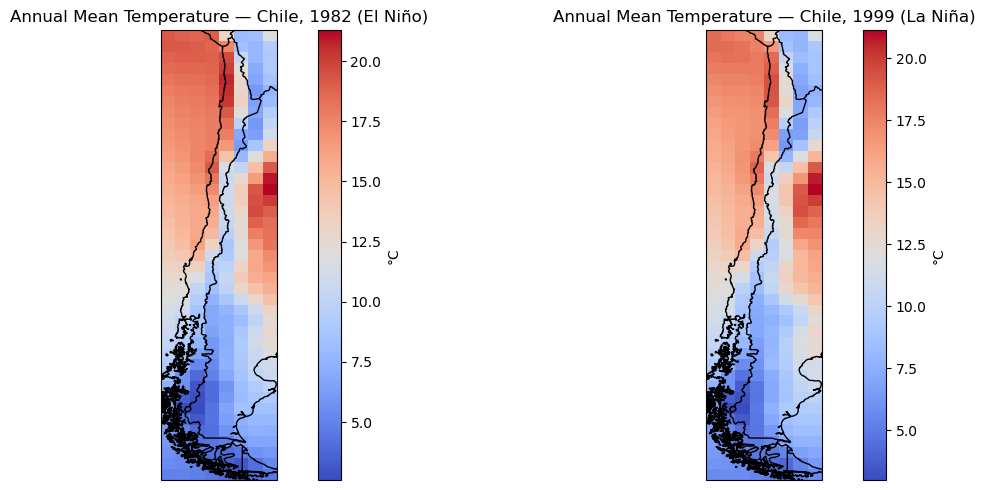

In [16]:
# Select annual temperature data
ds_tas_1982 = ds_tas['tas'].sel(time=slice('1982-01-01', '1982-12-31'), lat=lat_chile, lon=lon_chile)
ds_tas_1999 = ds_tas['tas'].sel(time=slice('1999-01-01', '1999-12-31'), lat=lat_chile, lon=lon_chile)

# Convert to Celsius and average over year
tas_1982 = ds_tas_1982.isel(member_id=0, dcpp_init_year=0) - 273.15
tas_1999 = ds_tas_1999.isel(member_id=0, dcpp_init_year=0) - 273.15

tas_1982_mean = tas_1982.mean(dim='time')
tas_1999_mean = tas_1999.mean(dim='time')

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 5), subplot_kw={'projection': ccrs.PlateCarree()})

# 1982
tas_1982_mean.plot(ax=axes[0], transform=ccrs.PlateCarree(), cmap='coolwarm',
                   cbar_kwargs={'label': '°C'})
axes[0].set_title('Annual Mean Temperature — Chile, 1982 (El Niño)')
axes[0].coastlines()
axes[0].add_feature(cfeature.BORDERS, linewidth=1)

# 1999
tas_1999_mean.plot(ax=axes[1], transform=ccrs.PlateCarree(), cmap='coolwarm',
                   cbar_kwargs={'label': '°C'})
axes[1].set_title('Annual Mean Temperature — Chile, 1999 (La Niña)')
axes[1].coastlines()
axes[1].add_feature(cfeature.BORDERS, linewidth=1)

plt.tight_layout()
plt.show()

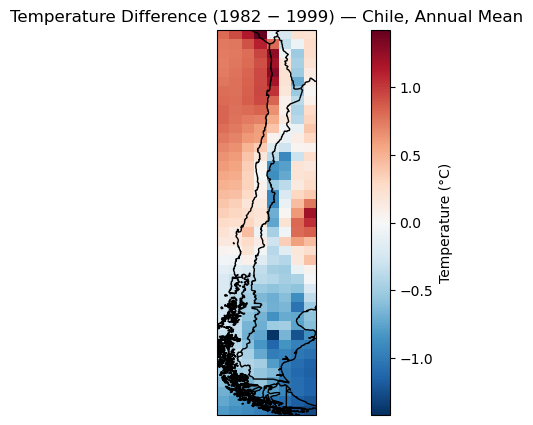

In [62]:
# Compute difference (°C)
tas_diff = tas_1982_mean - tas_1999_mean

# Plot difference
plt.figure(figsize=(14, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
tas_diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu_r', center=0,
              cbar_kwargs={'label': 'Temperature (°C)'})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.set_title('Temperature Difference (1982 − 1999) — Chile, Annual Mean')
plt.show()

### II.C. Precipitation Variation

**Now looking at Chile's precipitation variation using the same method, we again used CESM2 model from CMIP6 and computed the difference between sample years. The positive difference means that precipitation is higher in 1982; the negative difference means that precipitation is higher in 1999. We see that there's a +/- 35mm difference between those two years. During El Niño year, Central Chile has higher precipitation, and during La Niña year, Southern Chile has higher precipitation. Northern Chile does not experience much change in precipitation due to ENSO.**

In [18]:
# Load precipitation data
cat = col.search(
    source_id='CESM2',
    variable_id='pr',
    table_id='Amon',
    experiment_id='historical',
    member_id='r1i1p1f1',
)

In [19]:
# Load precip dataset
ds_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True, 'decode_times': True})
ds = list(ds_dict.values())[0]
ds


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


<xarray.Dataset> Size: 438MB
Dimensions:         (lat: 192, nbnd: 2, lon: 288, member_id: 1,
                     dcpp_init_year: 1, time: 1980)
Coordinates:
  * lat             (lat) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
    lat_bnds        (lat, nbnd) float64 3kB dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon             (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
    lon_bnds        (lon, nbnd) float64 5kB dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time            (time) object 16kB 1850-01-15 12:00:00 ... 2014-12-15 12:...
    time_bnds       (time, nbnd) object 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
Dimensions without coordinates: nbnd
Data variables:
    pr              (member_id, dcpp_init_year, time, lat, lon) float32 438MB dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
Attributes: (12/59)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             674885.0
    branch_time_in_parent:            219000.0
    case_id:                          15
    ...                               ...
    intake_esm_attrs:variable_id:     pr
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/CMIP/NCAR/CESM2/histor...
    intake_esm_attrs:version:         20190401
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NCAR.CESM2.historical.Amon.gn

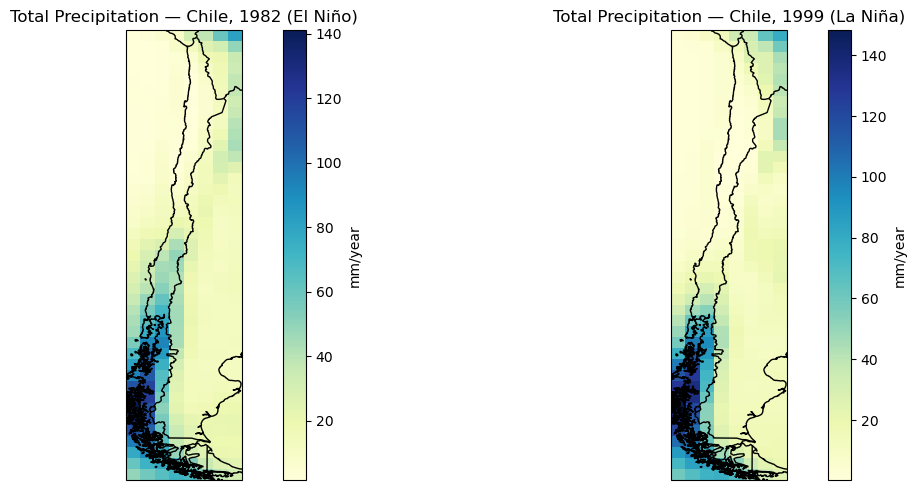

In [20]:
# Select year 1982 and 1999
ds_pr_1982 = ds['pr'].sel(time=slice('1982-01-01', '1982-12-31'), lat=lat_chile, lon=lon_chile)
ds_pr_1999 = ds['pr'].sel(time=slice('1999-01-01', '1999-12-31'), lat=lat_chile, lon=lon_chile)

# Convert to mm/year (from kg/m²/s = mm/s) (with help from google)
pr_1982_annual = ds_pr_1982.isel(member_id=0, dcpp_init_year=0) * 86400  # mm/day
pr_1999_annual = ds_pr_1999.isel(member_id=0, dcpp_init_year=0) * 86400

pr_1982_total = pr_1982_annual.sum(dim='time')
pr_1999_total = pr_1999_annual.sum(dim='time')

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 5), subplot_kw={'projection': ccrs.PlateCarree()})

# 1982 El Niño
pr_1982_total.plot(ax=axes[0], transform=ccrs.PlateCarree(), cmap='YlGnBu',
                   cbar_kwargs={'label': 'mm/year'})
axes[0].set_title('Total Precipitation — Chile, 1982 (El Niño)')
axes[0].coastlines()
axes[0].add_feature(cfeature.BORDERS, linewidth=1)

# 1999 La Niña
pr_1999_total.plot(ax=axes[1], transform=ccrs.PlateCarree(), cmap='YlGnBu',
                   cbar_kwargs={'label': 'mm/year'})
axes[1].set_title('Total Precipitation — Chile, 1999 (La Niña)')
axes[1].coastlines()
axes[1].add_feature(cfeature.BORDERS, linewidth=1)

plt.tight_layout()
plt.show()

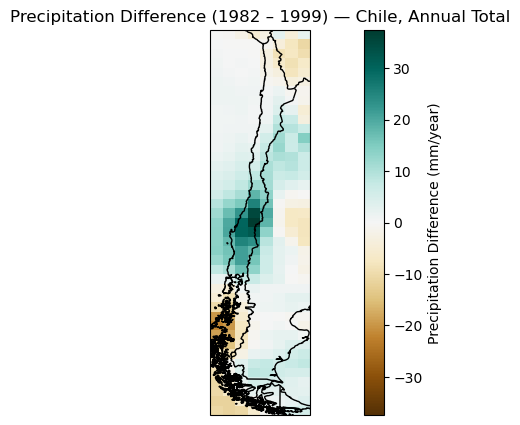

In [21]:
# Compute difference: El Niño − La Niña
pr_diff = pr_1982_total - pr_1999_total

# Plot difference map
plt.figure(figsize=(14, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
pr_diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='BrBG', center=0,
             cbar_kwargs={'label': 'Precipitation Difference (mm/year)'})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.set_title('Precipitation Difference (1982 – 1999) — Chile, Annual Total')
plt.show()

## III. Regression Analysis

In [22]:
pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]1/2 [openpyxl]
Note: you may need to restart the kernel to use updated packages.


In [44]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

precip_path = "https://raw.githubusercontent.com/YananZhang963/Final-Project/main/precipitation-annual-tre.csv"
correct_temp_path = "https://raw.githubusercontent.com/YananZhang963/Final-Project/main/average-mean-surface-air.csv"
oni_path = "https://raw.githubusercontent.com/YananZhang963/Final-Project/main/Monthly%20Oceanic%20Nino%20Index%20(ONI)%20-%20Wide.csv"
copper_price_path = "https://raw.githubusercontent.com/YananZhang963/Final-Project/main/Daily%20Copper%20Price.xlsx"
copper_production_demand_path = "https://raw.githubusercontent.com/YananZhang963/Final-Project/main/CopperProductionDemand.xlsx"

### III.A: Data Cleaning

In [45]:
def read_and_clean_climate_data(file_path, value_name):
    raw = pd.read_csv(file_path, sep=';', header=None)
    df = raw.copy().iloc[1:]
    df.columns = ['Year', 'CodeValue']
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
    df['Value'] = df['CodeValue'].astype(str).str.split(',').str[-1]
    df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
    df = df[['Year', 'Value']].dropna()
    df = df.rename(columns={'Value': value_name})
    return df

correct_precip_df = pd.read_csv(precip_path)
precip_clean = correct_precip_df[['Year', 'Annual Precipitation']].rename(
    columns={'Annual Precipitation': 'Precipitation'}
).dropna()
correct_precip_df

,Year,Annual Precipitation,Trend 1951-2020,Trend 1971-2020,Trend 1991-2020
0,1950,1599.28,NaN,NaN,NaN
1,1951,1620.59,1451.140487,NaN,NaN
2,1952,1308.84,1452.423359,NaN,NaN
3,1953,1626.74,1453.706231,NaN,NaN
4,1954,1660.37,1454.989103,NaN,NaN
...,...,...,...,...,...
69,2019,1451.85,1538.375784,1520.840746,1520.718194
70,2020,1486.43,1539.658656,1520.932165,1521.175591
71,2021,1297.33,NaN,NaN,NaN
72,2022,1414.47,NaN,NaN,NaN


In [46]:
# Clean copper price (daily to annual)
copper_df = pd.read_excel(copper_price_path, engine="openpyxl")
date_col = copper_df['Date']
is_numeric = pd.to_numeric(date_col, errors='coerce').notnull()

copper_df['Parsed_Date'] = pd.NaT
copper_df.loc[is_numeric, 'Parsed_Date'] = pd.to_datetime(
    copper_df.loc[is_numeric, 'Date'].astype(float), origin='1899-12-30', unit='D')
copper_df.loc[~is_numeric, 'Parsed_Date'] = pd.to_datetime(
    copper_df.loc[~is_numeric, 'Date'], errors='coerce')

copper_df['Year'] = copper_df['Parsed_Date'].dt.year
annual_copper = copper_df.groupby('Year')['Value'].mean().reset_index()
annual_copper = annual_copper.rename(columns={'Value': 'Copper_Price'})
annual_copper

# Clean ONI data to annual mean
oni_df = pd.read_csv(oni_path)
oni_df['Year'] = pd.to_numeric(oni_df['Year'], errors='coerce')
oni_df = oni_df.dropna(subset=['Year'])
oni_df['Year'] = oni_df['Year'].astype(int)
oni_df_numeric = oni_df.drop(columns=['Year']).apply(pd.to_numeric, errors='coerce')
oni_df['ONI'] = oni_df_numeric.mean(axis=1)
oni_annual = oni_df[['Year', 'ONI']]

oni_annual

# Load correct temperature dataset
correct_temp_df = pd.read_csv(correct_temp_path)
correct_temp_clean = correct_temp_df[['Year', 'Annual Average Mean Surface Air Temperature']]
correct_temp_clean = correct_temp_clean.rename(columns={
    'Annual Average Mean Surface Air Temperature': 'Temperature'
})
correct_temp_clean = correct_temp_clean.dropna()
correct_temp_clean

# Merge all climate datasets
df_fully_corrected = annual_copper.merge(precip_clean, on='Year', how='inner')
df_fully_corrected = df_fully_corrected.merge(correct_temp_clean, on='Year', how='inner')
df_fully_corrected = df_fully_corrected.merge(oni_annual, on='Year', how='inner')
df_corrected_sorted = df_fully_corrected.sort_values('Year')
df_corrected_sorted

# Clean and prepare industrial datasets about copper (supply and demand)
cop_industry = pd.read_excel(copper_production_demand_path, engine="openpyxl", skiprows=4)
cop_industry.head()
cop_industry

# Get clean datasets for World Production and Consumption
consum_prod = cop_industry[['Year', 'Consumption', 'World production']]
consum_prod

# Merge all datasets
alldata = pd.merge(df_corrected_sorted, consum_prod, on='Year', how='inner')
alldata

,Year,Copper_Price,Precipitation,Temperature,ONI,Consumption,World production
0,1959,0.310739,1449.99,8.30,0.050000,1330000.0,3430000.0
1,1960,0.298338,1330.97,8.77,-0.025000,1230000.0,3940000.0
2,1961,0.298112,1560.66,8.67,-0.066667,1330000.0,4090000.0
3,1962,0.292455,1190.10,8.86,-0.241667,1450000.0,4220000.0
4,1963,0.297616,1453.56,8.49,0.550000,1580000.0,4290000.0
5,1964,0.403233,1289.65,8.40,-0.366667,1660000.0,4450000.0
6,1965,0.489251,1578.89,8.35,0.766667,1820000.0,4660000.0
7,1966,0.633821,1291.67,8.29,0.341667,2140000.0,4580000.0
8,1967,0.491840,1389.65,8.21,-0.325000,1760000.0,4630000.0
9,1968,0.507980,1352.13,8.65,0.033333,1710000.0,5010000.0


### III.B: Exploratory Visualization of Each Variable Over Time

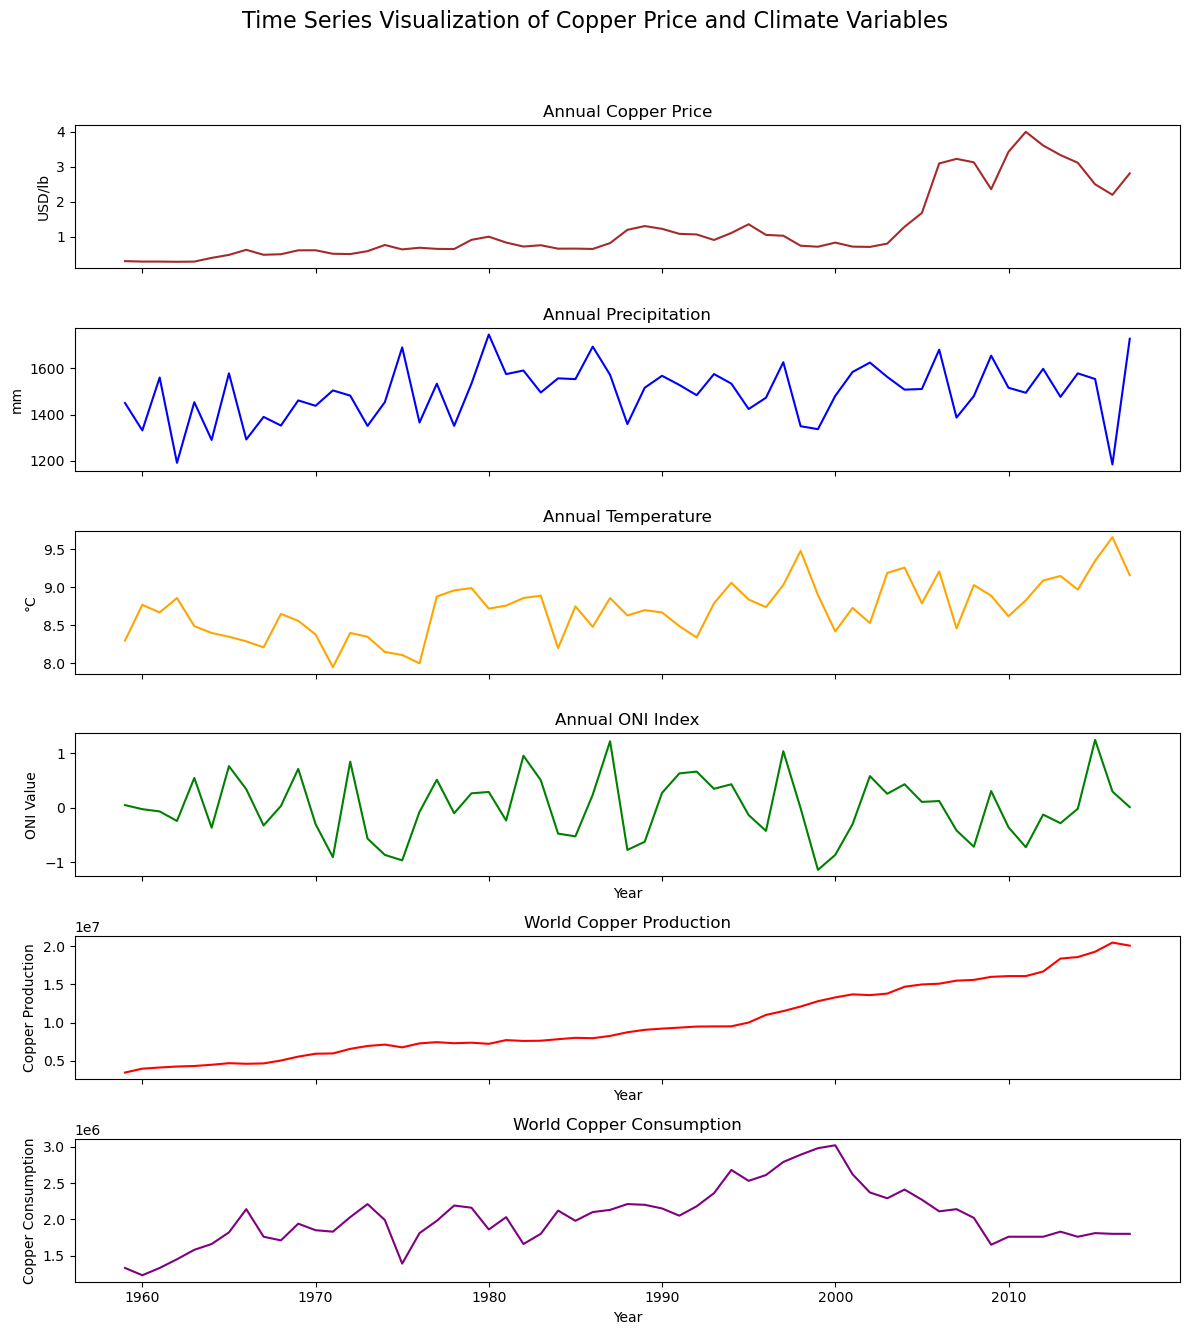

In [47]:
# Time Series Plots for Each Variable Separately
fig, axes = plt.subplots(6, 1, figsize=(12, 14), sharex=True)
fig.suptitle('Time Series Visualization of Copper Price and Climate Variables', fontsize=16)

# Copper Price
axes[0].plot(df_corrected_sorted['Year'], df_corrected_sorted['Copper_Price'], color='brown')
axes[0].set_title('Annual Copper Price')
axes[0].set_ylabel('USD/lb')

# Precipitation
axes[1].plot(df_corrected_sorted['Year'], df_corrected_sorted['Precipitation'], color='blue')
axes[1].set_title('Annual Precipitation')
axes[1].set_ylabel('mm')

# Temperature
axes[2].plot(df_corrected_sorted['Year'], df_corrected_sorted['Temperature'], color='orange')
axes[2].set_title('Annual Temperature')
axes[2].set_ylabel('°C')

# ONI Index
axes[3].plot(df_corrected_sorted['Year'], df_corrected_sorted['ONI'], color='green')
axes[3].set_title('Annual ONI Index')
axes[3].set_ylabel('ONI Value')
axes[3].set_xlabel('Year')

# World Copper Production
axes[4].plot(alldata['Year'], alldata['World production'], color='red')
axes[4].set_title('World Copper Production')
axes[4].set_ylabel('Copper Production')
axes[4].set_xlabel('Year')

# World Copper Demand
axes[5].plot(alldata['Year'], alldata['Consumption'], color='purple')
axes[5].set_title('World Copper Consumption')
axes[5].set_ylabel('Copper Consumption')
axes[5].set_xlabel('Year')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**These visualizations clearly demonstrate how climate and market variables evolve over time. Notably, any apparent correlations (or lack thereof) between these variables and copper prices may point toward underlying mechanisms influencing market behavior.**  

**One thing which we should be cautious about is these variables' noticeable upward trends over time, particularly for variables such as Copper Price, World Copper Production, and Temperature. Such concurrent upward movements imply that these variables may be influenced by common underlying long-term factors, such as global economic growth or climate change. Consequently, simple correlation or regression analyses might misleadingly suggest strong relationships merely because the variables share similar long-term growth trends, rather than because they have genuine causal or explanatory relationships. That's why we want to also involve some detrending analysis later in this section.**

### III.C: Raw Regression Analysis

#### Correlation Matrix of all variables:

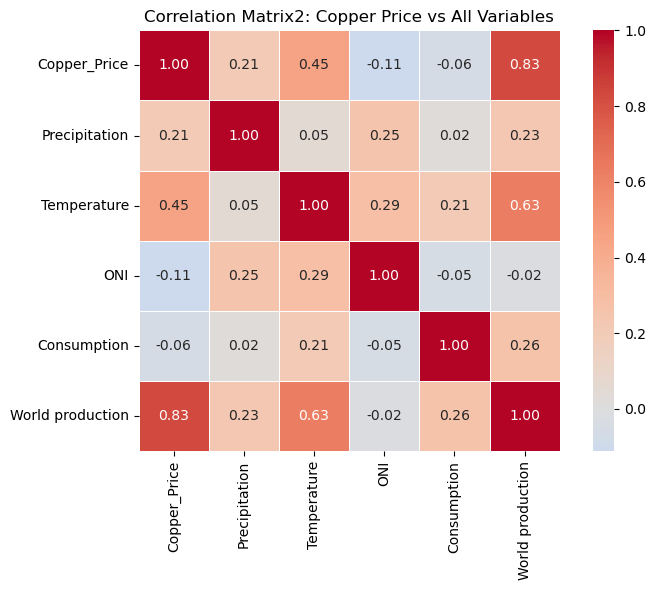

,Copper_Price,Precipitation,Temperature,ONI,Consumption,World production
Copper_Price,1.000000,0.210334,0.446756,-0.111790,-0.057025,0.826324
Precipitation,0.210334,1.000000,0.053673,0.254832,0.020329,0.231651
Temperature,0.446756,0.053673,1.000000,0.285612,0.212542,0.626955
ONI,-0.111790,0.254832,0.285612,1.000000,-0.050061,-0.017767
Consumption,-0.057025,0.020329,0.212542,-0.050061,1.000000,0.263727
World production,0.826324,0.231651,0.626955,-0.017767,0.263727,1.000000


In [48]:
corr_matrix2 = alldata[['Copper_Price', 'Precipitation', 'Temperature', 'ONI', 'Consumption', 'World production']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5, square=True)
plt.title('Correlation Matrix2: Copper Price vs All Variables')
plt.tight_layout()
plt.show()
corr_matrix2

**Main takeaways from this result:**
1. Strong correlation between Copper Price and World Production could indicate demand-driven market behavior: increased demand leads to both higher production and higher prices.

2. Moderate correlation between Copper Price and Temperature suggests climatic variables may have indirect impacts on market conditions, such as production efficiency or regional supply disruptions.

3. Weak correlations between Copper Price and ONI & Precipitation suggest limited direct explanatory power from these climate factors in isolation.

4. Weak correlation with Consumption highlights the complexity of market pricing mechanisms where simple supply-demand relationships might be masked by external economic conditions or speculative trading behaviors.

These introductory exploration gave rise to the necessity of looking at these relationship more closely using regression model so that we can see the exact effect of each of these variables and their statistical significance.

#### Raw 1: Copper price on climate variables

In [49]:
X_all = df_corrected_sorted[['Precipitation', 'Temperature', 'ONI']]
X_all = sm.add_constant(X_all)
y_all = df_corrected_sorted['Copper_Price']
model_all = sm.OLS(y_all, X_all).fit()
print("\n--- Regression: Copper Price ~ Precip + Temp + ONI ---")
print(model_all.summary())


--- Regression: Copper Price ~ Precip + Temp + ONI ---
                            OLS Regression Results                            
Dep. Variable:           Copper_Price   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     8.957
Date:                Thu, 10 Jul 2025   Prob (F-statistic):           6.31e-05
Time:                        18:21:03   Log-Likelihood:                -71.476
No. Observations:                  59   AIC:                             151.0
Df Residuals:                      55   BIC:                             159.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

#### Raw 2: World Copper Production on Climate variables in Chile

In [50]:
X_climate = alldata[['Precipitation', 'Temperature', 'ONI']]
X_climate = sm.add_constant(X_climate)
y_prod = alldata['World production']
model3 = sm.OLS(y_prod, X_climate).fit()
print("\n--- Regression: Copper Production ~ Precip + Temp + ONI---")
print(model3.summary())


--- Regression: Copper Production ~ Precip + Temp + ONI---
                            OLS Regression Results                            
Dep. Variable:       World production   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     18.46
Date:                Thu, 10 Jul 2025   Prob (F-statistic):           2.07e-08
Time:                        18:21:04   Log-Likelihood:                -969.32
No. Observations:                  59   AIC:                             1947.
Df Residuals:                      55   BIC:                             1955.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

#### Raw 3: Copper Demand on Climate Variables

In [51]:
y_demand = alldata['Consumption']
model4 = sm.OLS(y_demand, X_climate).fit()
print("\n--- Regression: Copper Demand ~ Precip + Temp + ONI---")
print(model4.summary())


--- Regression: Copper Demand ~ Precip + Temp + ONI---
                            OLS Regression Results                            
Dep. Variable:            Consumption   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.171
Date:                Thu, 10 Jul 2025   Prob (F-statistic):              0.329
Time:                        18:21:06   Log-Likelihood:                -842.14
No. Observations:                  59   AIC:                             1692.
Df Residuals:                      55   BIC:                             1701.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

#### Raw 4: Copper price on all variables (including both climate and industrial variables)

In [52]:
X_all2 = alldata[['Precipitation', 'Temperature', 'ONI', 'Consumption', 'World production']]
X_all2 = sm.add_constant(X_all2)
y_all2 = alldata['Copper_Price']
model_all2 = sm.OLS(y_all2, X_all2).fit()
print("\n--- Regression: Copper Price ~ Precip + Temp + ONI + Consumption + Production---")
print(model_all2.summary())


--- Regression: Copper Price ~ Precip + Temp + ONI + Consumption + Production---
                            OLS Regression Results                            
Dep. Variable:           Copper_Price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     37.23
Date:                Thu, 10 Jul 2025   Prob (F-statistic):           3.50e-16
Time:                        18:21:07   Log-Likelihood:                -38.763
No. Observations:                  59   AIC:                             89.53
Df Residuals:                      53   BIC:                             102.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

#### Visualize the regression relationship between copper production and each climate variable

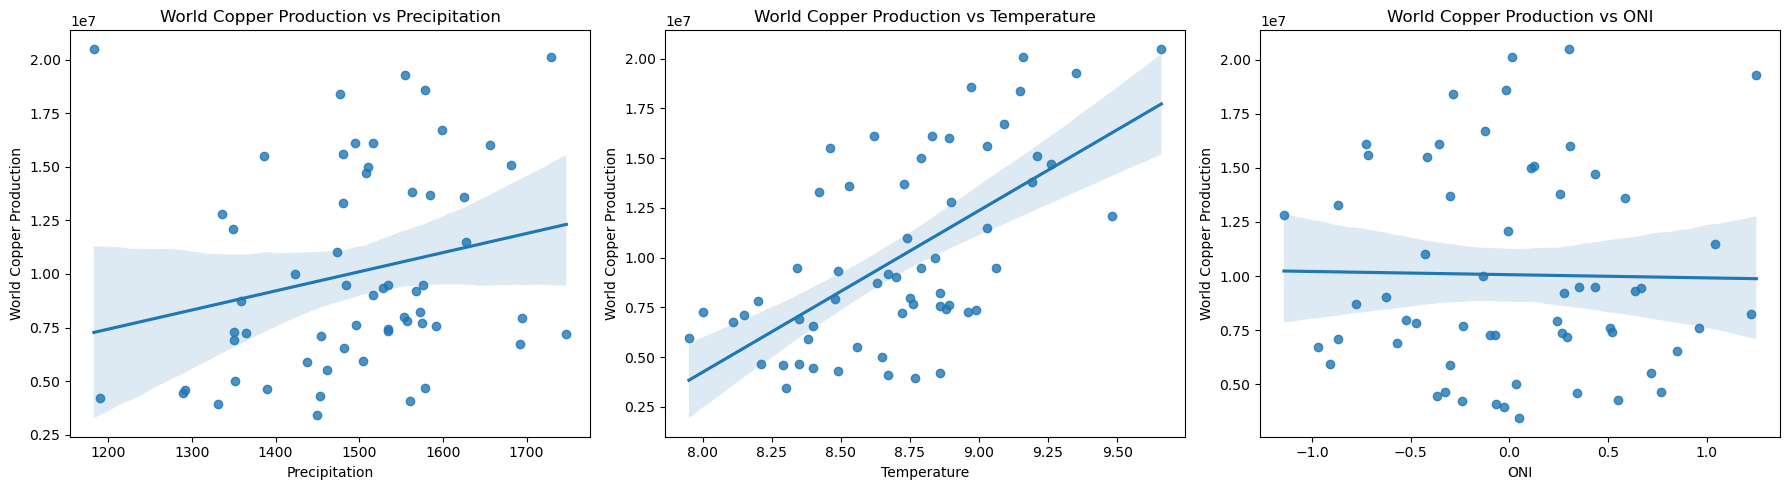

In [53]:
variables = ['Precipitation', 'Temperature', 'ONI']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, var in enumerate(variables):
    sns.regplot(x=var, y='World production', data=alldata, ax=axes[idx])
    axes[idx].set_title(f'World Copper Production vs {var}')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('World Copper Production')
plt.tight_layout()
plt.show()

**General Summary and Interpretation of Raw Regression Results:**

Our regression analyses on the raw data revealed several intuitive and expected relationships—for example, copper prices and copper production appear positively linked with climatic factors such as temperature and precipitation. However, we found something counterintuitive and interesting that warrants further exploration:

Counterintuitive Insight:

Notably, the Oceanic Niño Index (ONI), representing El Niño events, consistently showed a significant negative association with both copper prices and copper production. Intuitively, one might expect El Niño-related climate disruptions to constrain supply and push prices upward, but instead, we see the opposite effect.

Possible Interpretation:

This unexpected negative relationship could suggest more complex underlying mechanisms. For instance, El Niño events might be simultaneously causing global economic slowdowns or shifts in industrial activity that outweigh any immediate supply constraints, thus ultimately reducing copper prices and production. Alternatively, the observed negative relationships might simply reflect coincidental long-term economic or climatic trends rather than true causal interactions.

Connection to Detrending Analysis:

Because of these surprising results, and also because of the noticeable upward trends we observed on some variables in the exploratory visualization, we recognize a crucial possibility: the relationships we observed may be influenced or exaggerated by shared long-term trends (such as steady global economic growth or long-term climatic changes). To verify that the relationships we identify are meaningful, and not merely artifacts of common trends, it becomes essential to perform a detrending analysis.

Through detrending, we remove these overarching trends, enabling us to determine if these counterintuitive findings truly reflect causal or explanatory relationships rather than coincidental correlations due to simultaneous long-term trends. This will help us clarify the real underlying mechanisms that drive copper markets and climate interactions.

### IIID: Detrending Analysis

In [54]:
from scipy.signal import detrend
# Step 1: Detrend the variables
detrended_data = alldata.copy()
variables_to_detrend = ['Copper_Price', 'Precipitation', 'Temperature', 'ONI', 'World production', 'Consumption']

In [55]:
for var in variables_to_detrend:
    detrended_data[f'{var}_detrended'] = detrend(detrended_data[var].values)

#### Detrended 1: Copper Price on climate variables

In [56]:
X_detrend_climate = detrended_data[['Precipitation_detrended', 'Temperature_detrended', 'ONI_detrended']]
X_detrend_climate = sm.add_constant(X_detrend_climate)
y_detrend_copper_price = detrended_data['Copper_Price_detrended']
model_detrend1 = sm.OLS(y_detrend_copper_price, X_detrend_climate).fit()
print("\n--- Detrended Regression: Copper Price ~ Precip + Temp + ONI ---")
print(model_detrend1.summary())


--- Detrended Regression: Copper Price ~ Precip + Temp + ONI ---
                              OLS Regression Results                              
Dep. Variable:     Copper_Price_detrended   R-squared:                       0.034
Model:                                OLS   Adj. R-squared:                 -0.019
Method:                     Least Squares   F-statistic:                    0.6368
Date:                    Thu, 10 Jul 2025   Prob (F-statistic):              0.595
Time:                            18:21:08   Log-Likelihood:                -52.689
No. Observations:                      59   AIC:                             113.4
Df Residuals:                          55   BIC:                             121.7
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------

#### Detrended 2: World Copper Production on Climate variables in Chile

In [57]:
y_detrend_production = detrended_data['World production_detrended']
model_detrend2 = sm.OLS(y_detrend_production, X_detrend_climate).fit()
print("\n--- Detrended Regression: Copper Production ~ Precip + Temp + ONI ---")
print(model_detrend2.summary())


--- Detrended Regression: Copper Production ~ Precip + Temp + ONI ---
                                OLS Regression Results                                
Dep. Variable:     World production_detrended   R-squared:                       0.089
Model:                                    OLS   Adj. R-squared:                  0.039
Method:                         Least Squares   F-statistic:                     1.785
Date:                        Thu, 10 Jul 2025   Prob (F-statistic):              0.161
Time:                                18:21:09   Log-Likelihood:                -901.84
No. Observations:                          59   AIC:                             1812.
Df Residuals:                              55   BIC:                             1820.
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                              coef    std err          t   

#### Detrended 3: Demand on Climate Variables

In [58]:
y_detrend_demand = detrended_data['Consumption_detrended']
model_detrend3 = sm.OLS(y_detrend_demand, X_detrend_climate).fit()
print("\n--- Detrended Regression: Copper Demand ~ Precip + Temp + ONI ---")
print(model_detrend3.summary())


--- Detrended Regression: Copper Demand ~ Precip + Temp + ONI ---
                              OLS Regression Results                             
Dep. Variable:     Consumption_detrended   R-squared:                       0.016
Model:                               OLS   Adj. R-squared:                 -0.038
Method:                    Least Squares   F-statistic:                    0.3006
Date:                   Thu, 10 Jul 2025   Prob (F-statistic):              0.825
Time:                           18:21:09   Log-Likelihood:                -838.58
No. Observations:                     59   AIC:                             1685.
Df Residuals:                         55   BIC:                             1693.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------

#### Detrended 4: Copper Price on All variables

In [59]:
X_detrend_all = detrended_data[['Precipitation_detrended', 'Temperature_detrended', 'ONI_detrended',
                               'Consumption_detrended', 'World production_detrended']]
X_detrend_all = sm.add_constant(X_detrend_all)
model_detrend4 = sm.OLS(y_detrend_copper_price, X_detrend_all).fit()
print("\n--- Detrended Regression: Copper Price ~ Precip + Temp + ONI + Consumption + Production ---")
print(model_detrend4.summary())


--- Detrended Regression: Copper Price ~ Precip + Temp + ONI + Consumption + Production ---
                              OLS Regression Results                              
Dep. Variable:     Copper_Price_detrended   R-squared:                       0.493
Model:                                OLS   Adj. R-squared:                  0.445
Method:                     Least Squares   F-statistic:                     10.29
Date:                    Thu, 10 Jul 2025   Prob (F-statistic):           6.24e-07
Time:                            18:21:09   Log-Likelihood:                -33.680
No. Observations:                      59   AIC:                             79.36
Df Residuals:                          53   BIC:                             91.82
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                 coef    std err          t      P>|t|      [

#### Detrended Visualization

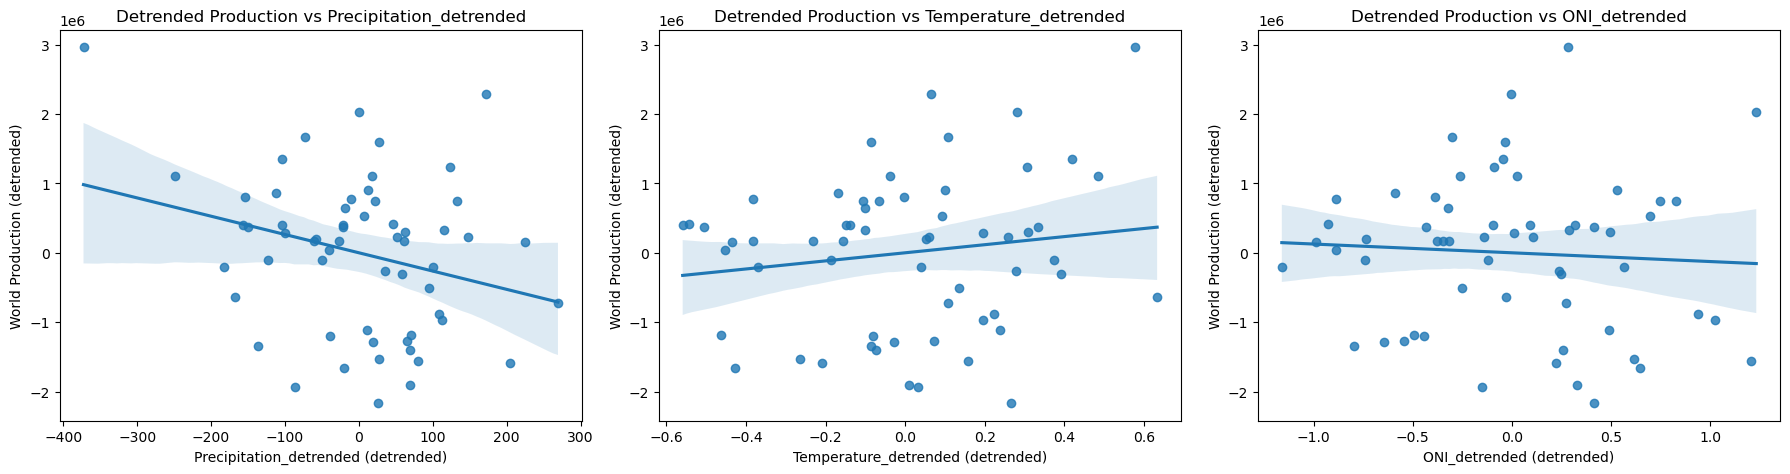

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, var in enumerate(['Precipitation_detrended', 'Temperature_detrended', 'ONI_detrended']):
    sns.regplot(x=var, y='World production_detrended', data=detrended_data, ax=axes[idx])
    axes[idx].set_title(f'Detrended Production vs {var}')
    axes[idx].set_xlabel(f'{var} (detrended)')
    axes[idx].set_ylabel('World Production (detrended)')

plt.tight_layout()
plt.show()

**Summary and Interpretation of Detrended Regression Results:**
After conducting detrending analysis, which removes common long-term trends from the variables, prevoious significant relationships largely disappear or weaken substantially. Specifically:

- Copper price, production, and consumption no longer show significant relationships with climate variables after detrending, suggesting that the previously observed associations were likely artifacts of shared long-term trends rather than genuine causal connections.

- Surprisingly, in the final detrended model including consumption and production, copper consumption becomes significantly negatively related to copper prices, a result that remains counterintuitive even after detrending.

Moreover, the continued negative relationship between copper consumption and copper prices after detrending is particularly intriguing. Intuitively, greater consumption should indicate higher .demand, typically raising prices. Yet, we observe the opposite. Possible interpretations can be:

- This could reflect short-term market adjustments or anticipatory behaviors. For instance, periods of high observed consumption might indicate markets expecting future price drops, causing downward pressure on prices despite immediate high consumption levels.

- Alternatively, consumption data might be capturing reactive demand rather than proactive demand—consumption increasing primarily when prices have already dropped, driven by market corrections rather than causing the price movements.

General Conclusion:
The detrending analysis importantly reveals that the initial significant relationships found in the raw regression models primarily stemmed from shared long-term trends (such as global economic growth or climatic shifts), rather than reflecting true explanatory relationships. Thus, the detrending step has proven essential to isolating meaningful short-term interactions.

### Future Directions for More Convincing Results:
Given these findings, future analyses should consider:

- Time Lag Analysis:
Introduce lagged variables to capture delayed effects, as climate events or economic shifts likely influence markets over different time horizons rather than instantaneously.

- Regional Breakdown:
Climate impacts are highly region-specific. Incorporating regional copper production and consumption data might reveal nuanced relationships masked by global aggregation.

- Try Monthly Data:
In our current analysis, we relied solely on annual data due to time and data constraints. However, future research should utilize monthly-scale data because copper production and prices are likely more sensitive to seasonal weather patterns and short-term climatic fluctuations. A monthly approach would allow us to capture these detailed seasonal dynamics—such as disruptions from heavy rains or droughts—that annual data aggregation might obscure, thereby providing more precise and robust insights into copper market mechanisms.

- Enhanced Multicollinearity Management:
Applying statistical techniques like Ridge or Lasso regression to handle potential multicollinearity could yield more robust and interpretable results.

By following these directions, subsequent research will yield deeper and more reliable insights into how climatic and economic factors interactively influence global copper markets.

### IV. SSP Scenario Analysis

Columns in Excel file:
Index(['Date', 'Value'], dtype='object')

Base price for 2025: 4.69 USD/tonne


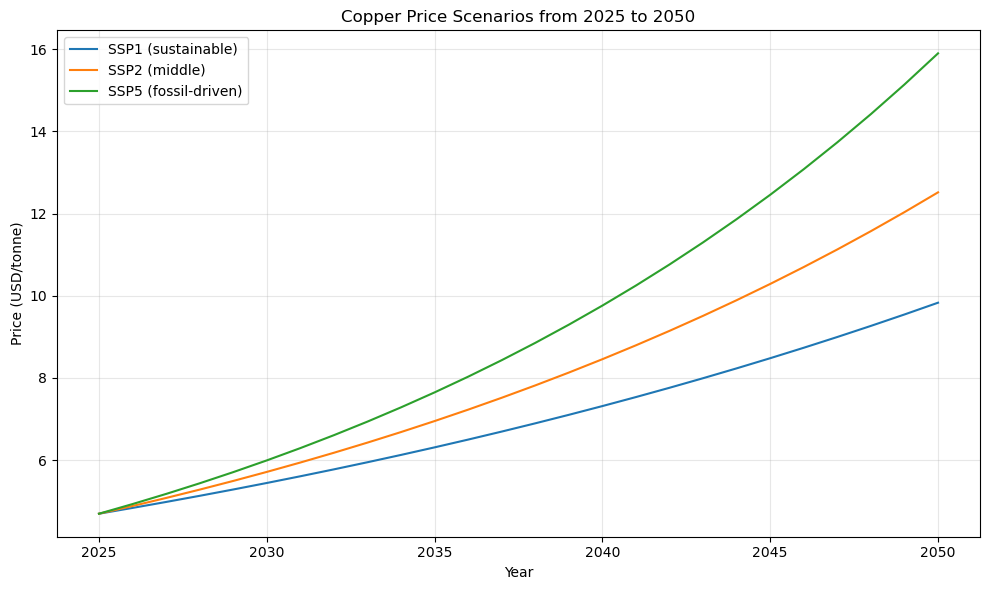

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load Excel file from GitHub using openpyxl
url = "https://raw.githubusercontent.com/YananZhang963/Final-Project/main/Daily%20Copper%20Price.xlsx"
df = pd.read_excel(url, engine='openpyxl')

# 2. Show column names to verify structure
print("Columns in Excel file:")
print(df.columns)

# 3. Try to identify the copper price column
possible_price_columns = ['Price_USD_per_tonne', 'Price', 'Copper Price', 'Daily Price', 'Value']

price_col = None
for col in df.columns:
    if col in possible_price_columns:
        price_col = col
        break

if price_col is None:
    raise ValueError("Could not identify the column for copper price. Please check the Excel file.")

# 4. Convert dates and clean data
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date', price_col])

# 5. Group by year and calculate average
df['Year'] = df['Date'].dt.year
annual = df.groupby('Year')[price_col].mean().reset_index()

# 6. Get base year and price
base_year = annual['Year'].max()
base_price = annual.loc[annual['Year'] == base_year, price_col].values[0]
print(f"\nBase price for {base_year}: {base_price:.2f} USD/tonne")

# 7. Define SSP scenario growth rates
scenarios = {
    'SSP1 (sustainable)': 0.03,
    'SSP2 (middle)': 0.04,
    'SSP5 (fossil-driven)': 0.05
}

# 8. Project copper prices till 2050
years = np.arange(base_year, 2051)
proj = {
    name: base_price * (1 + rate) ** (years - base_year)
    for name, rate in scenarios.items()
}
df_proj = pd.DataFrame(proj, index=years)

# 9. Plot results
plt.figure(figsize=(10, 6))
for name in df_proj.columns:
    plt.plot(df_proj.index, df_proj[name], label=name)
plt.title(f'Copper Price Scenarios from {base_year} to 2050')
plt.xlabel('Year')
plt.ylabel('Price (USD/tonne)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


